# Homework 1

In [45]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as stats
import statsmodels.api as sm

from scipy.stats import t

import matplotlib.pyplot as plt

# 3
Suppose we have a data set with five predictors, 
    X1 = GPA,
    X2 = IQ, 
    X3 = Level (1 for College and 0 for High School), 
    X4 = Interaction between GPA and IQ, and 
    X5 = Interaction between GPA and Level. 

The response is starting salary after graduation (in thousands
of dollars). Suppose we use least squares to fit the model, and get
 
    β0 = 50, 
    β1 = 20,  
    β2 = 0.07, 
    β3 = 35, 
    β4 = 0.01, 
    β5 = −10.

## (a) Which answer is correct, and why?

Fixed IQ and Fixed GPA. 

Salary = β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5
where X4 = X1*X2 and X5 = X1*X3

For Highschoolers, X3 = 0
SalaryHs = 50+20*X1+.07X2+35*0+.01X1X2+(-10)0X1
SalaryHs = 50+20X1+0.7X2+0.1X1X2

For College, X3 = 1
SalaryCl = 50+20*X1+.07X2+35*1+.01X1X2+(-10)1X1

College - Highschoolers
SalaryDiff = SalaryCl - SalaryHs
SalaryDiff = 35 - 10*X1
where X1 = GPA

If GPA > 3.5, college makes less. GPA < 3.5, college makes more.


iii. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates provided that the
GPA is high enough.

## (b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

Salary = 50+20*4+0.07*110+35*1+0.01*4*110-10*4*1



Salary = 137.1

## (c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.


False. We need to look at the p-value or t-test value to determine if there is significance.

# 8
This question involves the use of simple linear regression on the Auto
data set.

## (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output.

In [46]:
dataframe = pd.read_csv('Auto.csv')
dataframe.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [47]:
dataframe.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [48]:
lm_fit = stats.ols(formula='mpg~horsepower', data=dataframe).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     605.1
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.08e-81
Time:                        21:18:33   Log-Likelihood:                -1195.2
No. Observations:                 397   AIC:                             2394.
Df Residuals:                     395   BIC:                             2402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0619      0.717     55.905      0.000      38.653      41.471
horsepower    -0.1588      0.006    -24.599      0.000      -0.171      -0.146
==============================================================================
Omnibus:                       16.560   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.444
Skew:                           0.494   Prob(JB):                     0.000163
Kurtosis:                       3.278   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## i. Is there a relationship between the predictor and the response?
The p value is at 0.000, which is less than the confidence interval of .05. There is a significant relationship and we reject the null hypothesis

## How strong is the relationship between the predictor and the response?
The R-squared value is 0.605. The relationship is not so strong, but it exists.

## iii. Is the relationship between the predictor and the response positive or negative?
The coefficienct of horsepower is -0.1588. The relationship is negative.


In [49]:
y_pred = lm_fit.predict(dataframe.horsepower)

lm_fit.conf_int()

,0,1
Intercept,38.653036,41.470716
horsepower,-0.171467,-0.146087



## iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?


In [50]:
#Sey_hat = sqrt(Var(y_hat))
#Var(y_hat) = sigma^2(1/n+[SUM(xf-xbar)^2]/SUM[xi-xbar)^2])
#sigma = SUM(y - y_hat)^2/(n-2)
xf = 98
numObservations = len(dataframe.horsepower)
xi = dataframe.horsepower
xbar = np.mean(dataframe.horsepower)

#Grabs coefficients from data given.
y_hat = lm_fit.params.values[0] + lm_fit.params.values[1] * xf 
print("Predicted mpg: ", y_hat)
y = dataframe.mpg
sigNum = np.sum(np.power(y-y_hat,2))
sigma = sigNum/(numObservations-2)

num = np.power(xf-xbar,2)
den = np.sum(np.power(xi-xbar,2))

var = sigma*(1+(1/numObservations) + (num/den))
sey_hat = np.sqrt(var)

#95% confidence and prediction intervals
alpha = 0.5
tcrit = t.ppf(alpha/2,numObservations-2)
lower = y_hat+tcrit*sey_hat
upper = y_hat-tcrit*sey_hat

print("Confidence interval [",lower,",",upper,"]")

Predicted mpg:  24.50172642530385
Confidence interval [ 19.162951218981398 , 29.840501631626303 ]


## (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

Text(0.5, 0, 'Horsepower')

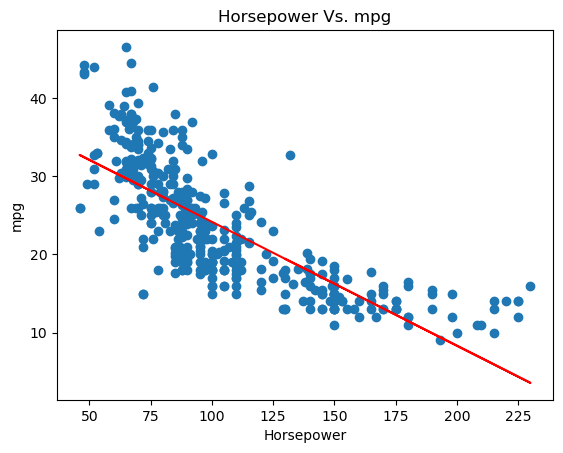

In [51]:
plot.scatter(dataframe.horsepower,dataframe.mpg)
y_horsepred = lm_fit.predict(dataframe.horsepower)
plt.plot(dataframe.horsepower, y_horsepred, color='red', label = 'Regression Line')
plt.title("Horsepower Vs. mpg")
plot.ylabel("mpg")
plot.xlabel("Horsepower")

## Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

Text(0.5, 0, 'horsepower')

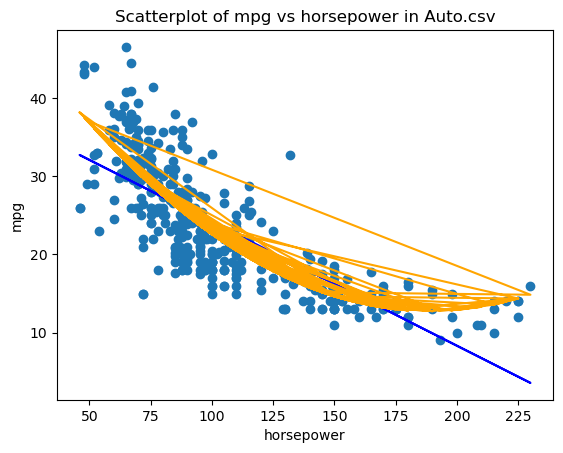

In [52]:
# linear regression
lm_fit1 = stats.ols('mpg~horsepower', data = dataframe).fit()
# quadratic regression
lm_fit2 = stats.ols('mpg~horsepower+np.power(horsepower, 2)', data = dataframe).fit()
plt.scatter(dataframe.horsepower, dataframe.mpg)
y_pred1 = lm_fit1.predict(dataframe.horsepower)
y_pred2 = lm_fit2.predict(dataframe.horsepower) # quadratic regression
plt.plot(dataframe.horsepower, y_pred1, color="blue")
plt.plot(dataframe.horsepower, y_pred2, color="orange")
plt.title('Scatterplot of mpg vs horsepower in Auto.csv')
plt.ylabel('mpg')
plt.xlabel('horsepower')



A quadratic fits much better to how the scatter plot is trending

# 10. This question should be answered using the Carseats data set.

## (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [53]:
df = pd.read_csv('Carseats.csv')
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [54]:
#Sales as response, price+urban+US as predictors
lm_fit = stats.ols(formula='Sales~Price+Urban+US', data=df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.39e-23
Time:                        21:18:34   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

P-values : US and Price are lower than .05. They are both significant. Reject their null hypothesis. Urban is at 0.936, so we cannot reject null hypothesis.
Coefficient: US has a positive coefficient, while Urban and Price have a negative coefficient, which correlate how they relate to sales. Negative = inversely proportional relationship. Positive = proportional relationship.

## (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

β0 = 13.0435
β1 = -0.0219
β2 = 1.2006
β3 = -0.0545
X1 = Urban
X2 = US
X3 = Price

Sales = β0 + β1*X1 + β2*X2 + β3*X3
Sales = 13.0435 - 0.0219(Urban) + 1.2006(US) - 0.0545(Price)

## (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?
Reject null hypothesis for US and Price.

## e) On the basis of your response to the previous question, fit asmaller model that only uses the predictors for which there is evidence of association with the outcome.

In [55]:
lm_fit2 = stats.ols(formula='Sales~Price+US', data=df).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.66e-24
Time:                        21:19:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (f) How well do the models in (a) and (e) fit the data?
The R- square values remain similar, showing a weak relationship between predictor and response. p-values also remain the same.
t-values also remain very similar to each other for both predictors.
The largest difference is in the F-statistic, with (e) having a 50% higher F-statistic than (a)

## (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [56]:
lm_fit2.conf_int(alpha=0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


## (h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [57]:
df.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

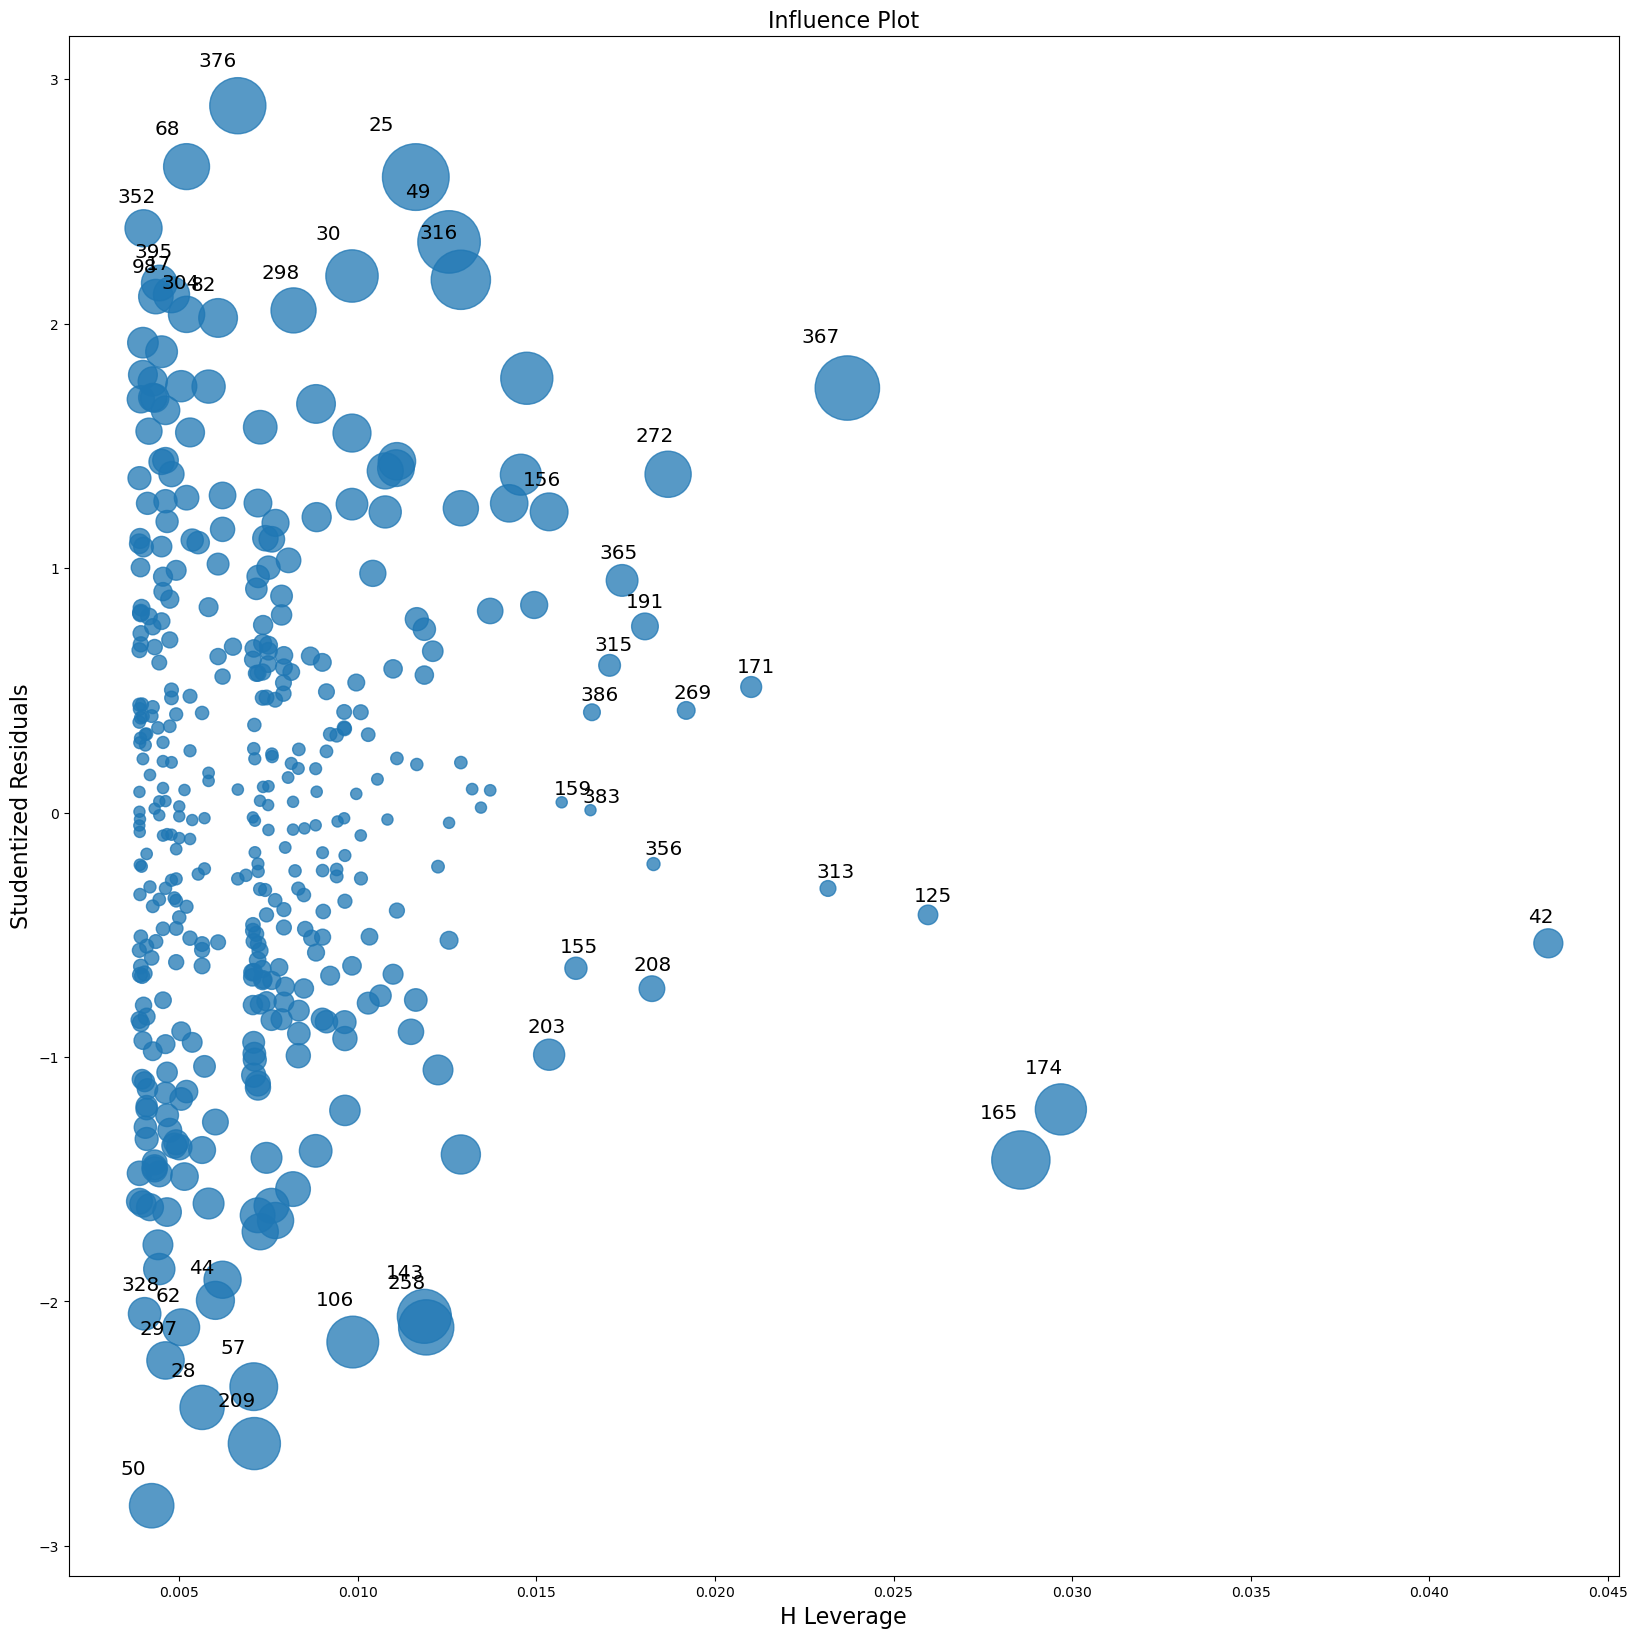

In [62]:
#Lecture 3 Slide 43

fig, ax = plt.subplots(figsize=(20,20))

fig = sm.graphics.influence_plot(lm_fit2, ax=ax, criterion="cooks")

There is evidence of both high leverage points and outliers according to the influence plot

# 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

## (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [63]:
df = pd.read_csv("Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [64]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

,Predictor,Coefficient,P-Value
0,medv,-0.073935,5.506472e-06
1,medv,0.509776,1.450349e-21
2,medv,-1.892777,2.094345e-01
3,medv,31.248531,3.751739e-23
4,medv,-2.684051,6.346703e-07
5,medv,0.107786,2.854869e-16
6,medv,-1.550902,8.519949e-19
7,medv,0.617911,2.693844e-56
8,medv,0.029742,2.357127e-47
9,medv,1.151983,2.942922e-11


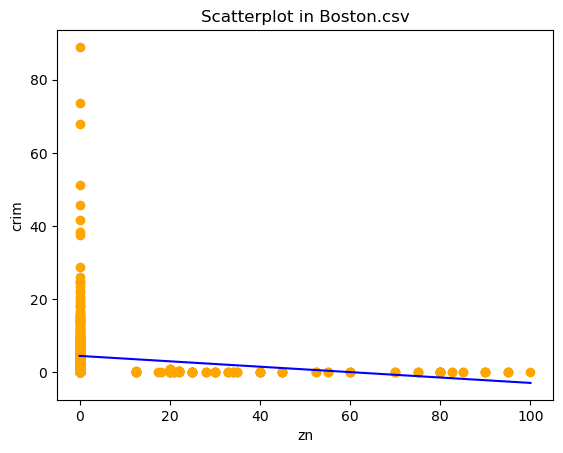

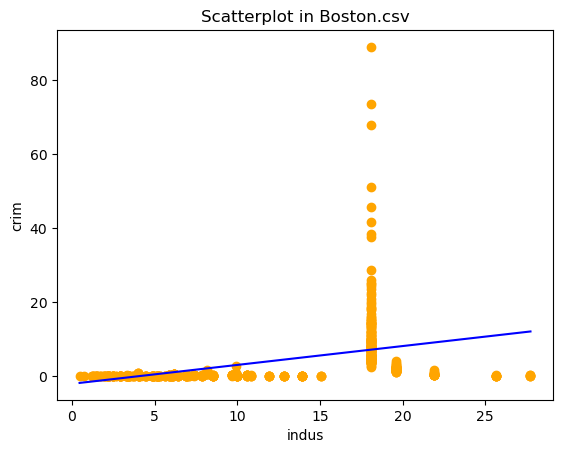

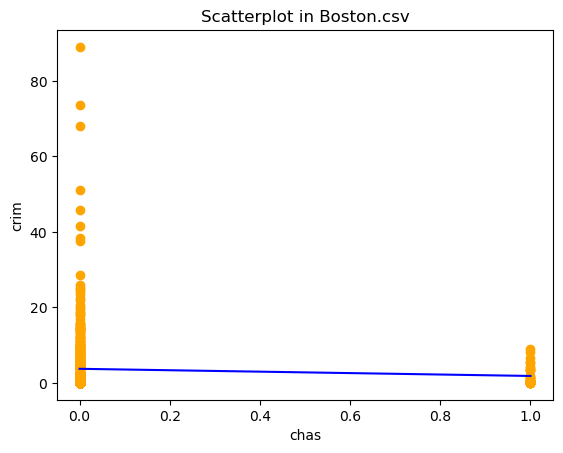

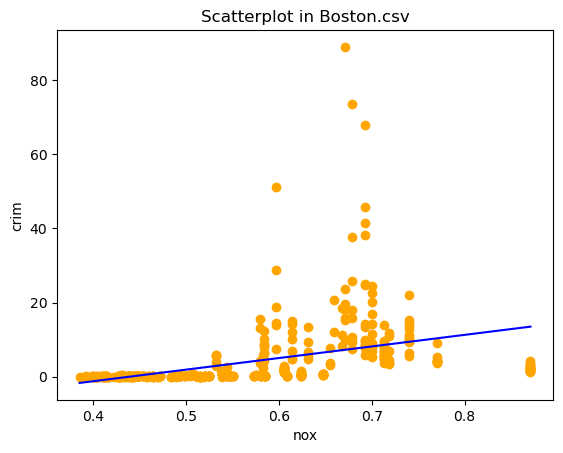

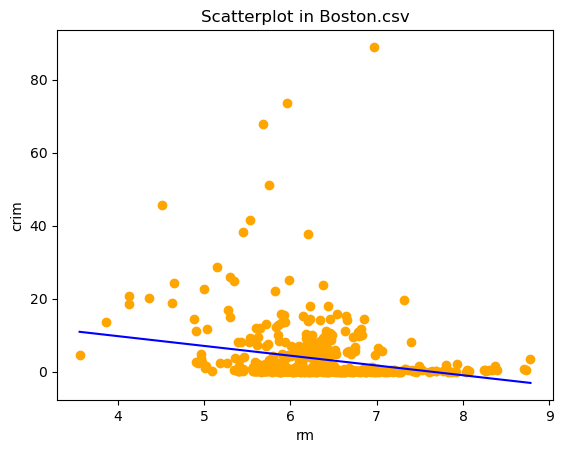

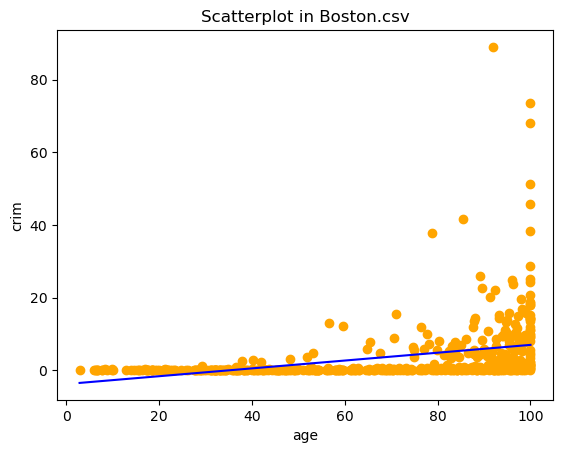

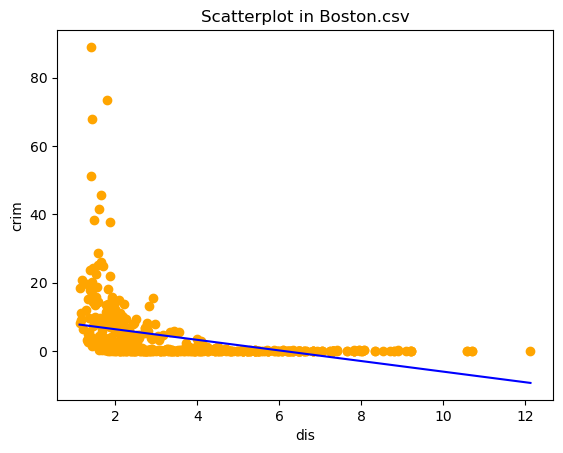

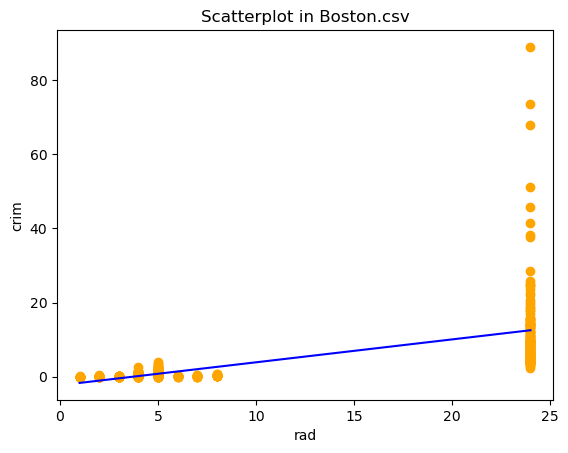

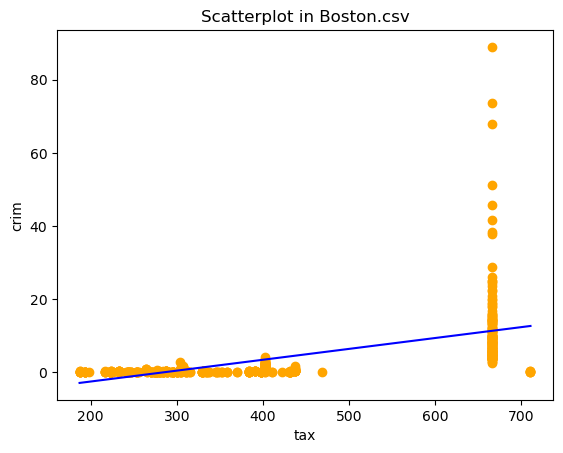

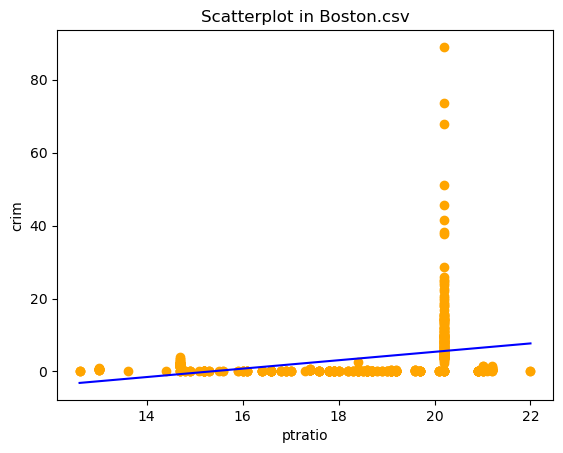

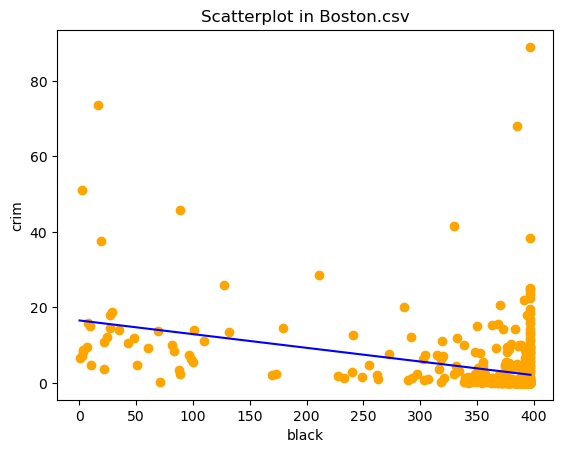

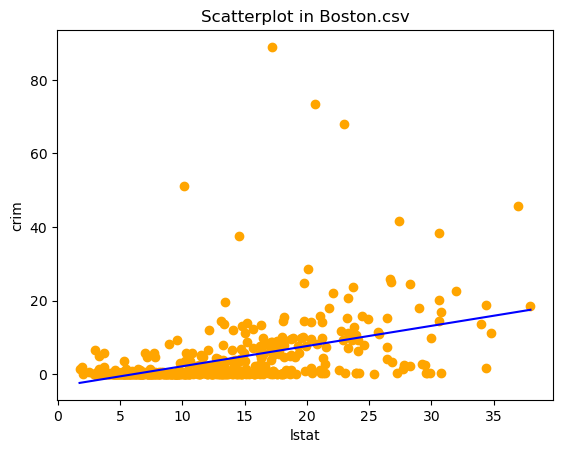

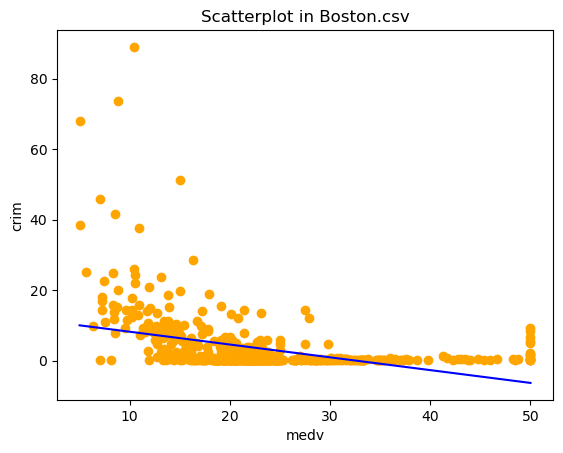

In [108]:
# Had a lot of trouble with this problem. Tried doing it one by one but got
# really messy and tried making arrays myself.
coefs = []
predictors = []
p_vals = []

for predictor in df.columns:
    if predictor != 'crim':
        my_formula = "crim~" + predictor
        lm_fit = stats.ols(formula=my_formula, data=df).fit()
        predictors.append(predictor)
        p_vals.append(lm_fit.pvalues[1])
        coef = lm_fit.params[predictor]
        coefs.append(coef)
        
        x_val = df[predictor]
        y_pred = lm_fit.predict(x_val)

        df_new = pd.DataFrame({'X': df[predictor], 'Y':df.crim, 'Y_hat': y_pred}, columns= ['X', 'Y', 'Y_hat'])
        df_new.sort_values(by=['X'], inplace=True)
        plt.figure()
        plt.scatter(df_new.X, df_new.Y, color = 'orange')
        plt.plot(df_new.X, df_new.Y_hat, color="blue")
        plt.title('Scatterplot in Boston.csv')
        plt.ylabel('crim')
        plt.xlabel(predictor)

        
pd.DataFrame({'Predictor':predictor, 'Coefficient': coefs, 'P-Value':p_vals})

Looking at the p-values, the only non significant one is Chas. The rest look significant.

## (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [109]:
allCol = "+".join(df.columns.difference(["crim"]))

lm_fit = stats.ols(formula='crim~'+allCol,data=df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.57e-56
Time:                        22:30:49   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
age            0.0015      0.018      0.081      0.935      -0.034       0.037
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
rad            0.5882      0.088      6.680      0.000       0.415       0.761
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
zn             0.0449      0.019      2.394      0.017       0.008       0.082
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All p-values that are under .05 are statistically significant.
Intercept, black, ids, medv, rad, and zn

## (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.



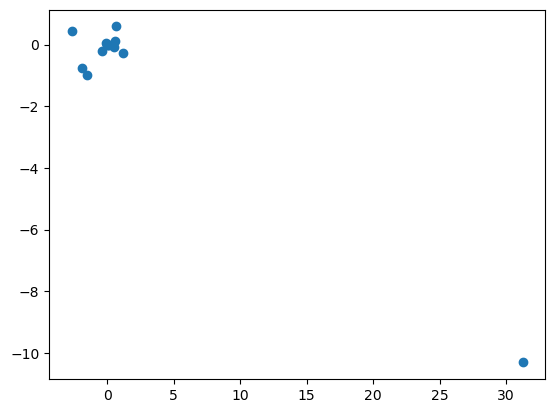

In [112]:
response = "crim"
multiCoefs = []
for predictor in predictors:
    multiCoefs.append(lm_fit.params[predictor])
plt.scatter(coefs,multiCoefs)


(a) Had all but one predictor(chas) that were statistically significant. Comparatively to (b), b had less predictors that were statistically significant, even chas wasn't significant.
There is one point that is way off compared to the other points

## Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = β0 + β1X + β2X2 + β3X3 + ϵ.

In [113]:
#cubic polynomial
for predictor in predictors:
    lm_fitcubed = stats.ols(f"{response} ~ {predictor} + np.power({predictor}, 2) + np.power({predictor}, 3)", data=df).fit()   
    print(lm_fitcubed.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.28e-06
Time:                        22:35:40   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     

The following show non-linear association
zn2 and zn3
rm, rm2, rm3. Was already statistically significant, but shows there is a non-linear association
rad2,rad3
tax2,tax3
black2,black3
lstat2,lstat3